In [7]:
%%capture
!wget https://www.dropbox.com/s/u8qyvuyie2op286/spk1_snt1.wav
!pip install speechbrain

In [ ]:
import torch
import matplotlib.pyplot as plt
from speechbrain.dataio.dataio import read_audio

signal = read_audio('spk1_snt1.wav').unsqueeze(1)
print(signal.shape)

# real signal (img_par is all zeros)
img_part = torch.zeros_like(signal)
signal = torch.cat([signal,img_part],1)

# fft computation
fft = torch.fft.fft(signal,1)
print(fft)
print(fft.shape)

torch.Size([45920, 1])
tensor([[-9.1553e-05+0.j],
        [-9.1553e-05+0.j],
        [-9.1553e-05+0.j],
        ...,
        [-5.3711e-03+0.j],
        [-5.1880e-03+0.j],
        [-5.3711e-03+0.j]])
torch.Size([45920, 1])


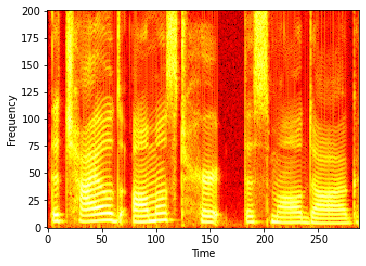

In [8]:
import torch
import matplotlib.pyplot as plt
from speechbrain.dataio.dataio import read_audio
from speechbrain.processing.features import STFT

signal = read_audio('spk1_snt1.wav').unsqueeze(0) # [batch, time]

compute_STFT = STFT(sample_rate=16000, win_length=25, hop_length=10, n_fft=400)
signal_STFT = compute_STFT(signal)

spectrogram = signal_STFT.pow(2).sum(-1) # Power spectrogram
spectrogram = spectrogram.squeeze(0).transpose(0,1)
spectrogram = torch.log(spectrogram)

plt.imshow(spectrogram.squeeze(0), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

Mel

$m=2595log10(1+f/700)$

$f=700(10m/2595−1)$

Mel FB puts more filters in the lower spectrum and fewer in the high spectrum.

torch.Size([1, 288, 201, 2])
torch.Size([1, 288, 201])
torch.Size([1, 288, 40])


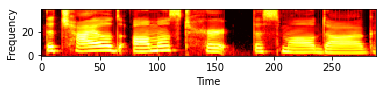

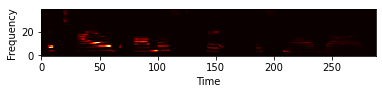

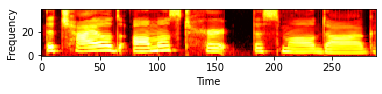

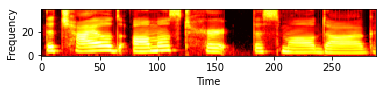

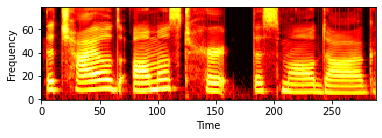

In [15]:
from speechbrain.processing.features import spectral_magnitude
from speechbrain.processing.features import Filterbank

compute_fbanks = Filterbank(n_mels=40, log_mel=True)

STFT = compute_STFT(signal)
mag = spectral_magnitude(STFT)
fbanks = compute_fbanks(mag)

print(STFT.shape)
print(mag.shape)
print(fbanks.shape)

plt.imshow(fbanks.squeeze(0).t(), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Not log-Mel
compute_fbanks = Filterbank(n_mels=40, log_mel=False)

STFT = compute_STFT(signal)
mag = spectral_magnitude(STFT)
fbanks = compute_fbanks(mag)

plt.imshow(fbanks.squeeze(0).t(), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# log-Mel Rect Filter
compute_fbanks = Filterbank(n_mels=40, log_mel=True, filter_shape='rectangular')

STFT = compute_STFT(signal)
mag = spectral_magnitude(STFT)
fbanks = compute_fbanks(mag)

plt.imshow(fbanks.squeeze(0).t(), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# log-Mel Gaussian Filter
compute_fbanks = Filterbank(n_mels=40, log_mel=True, filter_shape='gaussian')

STFT = compute_STFT(signal)
mag = spectral_magnitude(STFT)
fbanks = compute_fbanks(mag)

plt.imshow(fbanks.squeeze(0).t(), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# log-Mel 80 Mel FBanks
compute_fbanks = Filterbank(n_mels=80)

STFT = compute_STFT(signal)
mag = spectral_magnitude(STFT)
fbanks = compute_fbanks(mag)

plt.imshow(fbanks.squeeze(0).t(), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


# Bark 80 FBanks


Different shapes for the filter can be selected.
For example rectangular, triangular, gaussian, etc.



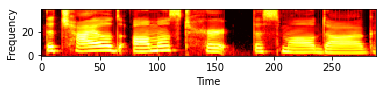

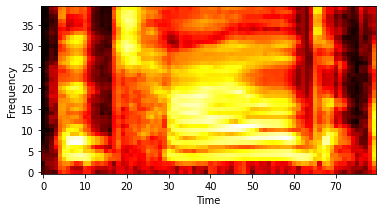

In [10]:
from speechbrain.lobes.features import Fbank
fbank_maker = Fbank()
fbanks = fbank_maker(signal)

plt.imshow(fbanks.squeeze(0).t(), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Zoom of first 80 steps
plt.imshow(fbanks.squeeze(0).t()[:,0:80], cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()